In [1]:
#Κόσυβας Δημήτριος ΑΜ:03114828
#Θ2
import datetime
import pandas as pd
from math import *
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import itur
import astropy.units as u
from scipy.stats import rayleigh
from scipy.stats import chi2
import cmath
import random

In [80]:
#α)
#Ανεξάρτητες άρα ασυσχέτιστες διαλείψεις
#Πιο κάτω σχεδιάζω τις θεωρητικές καμπύλες γth/(γ μέσο) για συστήματα διαφορισμού επιλεκτικού συνδυασμού (SC)
#γ_μεσο=8 dB 
g=[]
Pout1=[]
Pout2=[]
Pout4=[]
Pout5=[]
for i in arange(-80,10,0.0005):
    g.append(i)

In [81]:
for i in range(0,len(g)):
    Pout1.append(1-np.exp(-10**(g[i]/10)))
    Pout2.append((1-np.exp(-10**(g[i]/10)))**2)
    Pout4.append((1-np.exp(-10**(g[i]/10)))**4)
    Pout5.append((1-np.exp(-10**(g[i]/10)))**5)
    


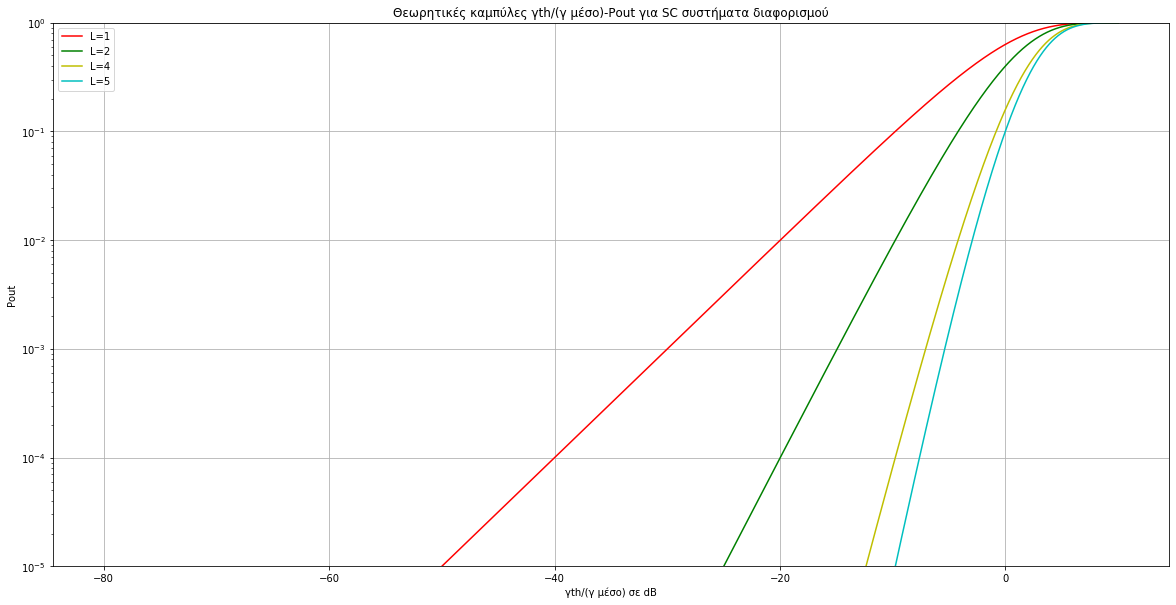

In [82]:
plt.figure(figsize=(20,10))
plt.semilogy(g,Pout1,'r',label='L=1')
plt.semilogy(g,Pout2,'g',label='L=2')
plt.semilogy(g,Pout4,'y',label='L=4')
plt.semilogy(g,Pout5,'c',label='L=5')
plt.legend(loc="upper left")
plt.ylim(10**-5,1)
plt.title("Θεωρητικές καμπύλες γth/(γ μέσο)-Pout για SC συστήματα διαφορισμού")
plt.ylabel("Pout")
plt.xlabel("γth/(γ μέσο) σε dB")
plt.grid()
plt.show()


In [84]:
def PoutSC(L):
    N=12000
    Pout=[]
    for i in arange(1,9,0.5):
        count=0
        for j in range(0,N):
            if L==1:
                s = (-1+0j) + 2*np.random.randint(2,size=1)
                h  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r  = h* s + n 
                gsc = (abs(r))**2 #Η ισχύς του θορύβου -108dBm απλοποιείται κατά τη σύγκριση με το κατώφλι σε κάθε περίπτωση
                x = -7.5 + i
                if gsc<(10**x): 
                    count=count+1
            elif L==2:
                s1 = (-1+0j) + 2*np.random.randint(2,size=1)
                h1  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n1  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r1  = h1* s1 + n1
                g1 = (abs(r1))**2
                s2 = (-1+0j) + 2*np.random.randint(2,size=1)
                h2  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n2  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r2  = h2* s2 + n2
                g2 = (abs(r2))**2
                x = -7.5 + i
                gsc = max(g1,g2)
                if gsc<(10**x):
                    count=count+1
            elif L==4:
                s1 = (-1+0j) + 2*np.random.randint(2,size=1)
                h1  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n1  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r1  = h1* s1 + n1
                g1 = (abs(r1))**2
                s2 = (-1+0j) + 2*np.random.randint(2,size=1)
                h2  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n2  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r2  = h2* s2 + n2
                g2 = (abs(r2))**2
                s3 = (-1+0j) + 2*np.random.randint(2,size=1)
                h3  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n3  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r3  = h3* s3 + n3
                g3 = (abs(r3))**2
                s4 = (-1+0j) + 2*np.random.randint(2,size=1)
                h4  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n4  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r4  = h4* s4 + n4
                g4 = (abs(r4))**2
                x = -7.5 + i
                gsc = max(g1,g2,g3,g4)
                if gsc<(10**x):
                    count=count+1
            else:
                s1 = (-1+0j) + 2*np.random.randint(2,size=1)
                h1  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n1  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r1  = h1* s1 + n1
                g1 = (abs(r1))**2
                s2 = (-1+0j) + 2*np.random.randint(2,size=1)
                h2  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n2  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r2  = h2* s2 + n2
                g2 = (abs(r2))**2
                s3 = (-1+0j) + 2*np.random.randint(2,size=1)
                h3  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n3  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r3  = h3* s3 + n3
                g3 = (abs(r3))**2
                s4 = (-1+0j) + 2*np.random.randint(2,size=1)
                h4  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n4  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r4  = h4* s4 + n4
                g4 = (abs(r4))**2
                s5 = (-1+0j) + 2*np.random.randint(2,size=1)
                h5  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n5  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r5  = h5* s5 + n5
                g5 = (abs(r5))**2
                x = -7.5 + i
                gsc = max(g1,g2,g3,g4,g5)
                if gsc<(10**x):
                    count=count+1
        Pout.append(count/N)
    return Pout






In [55]:
Posim1=PoutSC(1)

In [56]:
Posim2=PoutSC(2)

In [57]:
Posim4=PoutSC(4)

In [58]:
Posim5=PoutSC(5)

In [65]:
g2=[]
for i in arange(-66,10,5):
    g2.append(i)

In [66]:
len(g2)

16

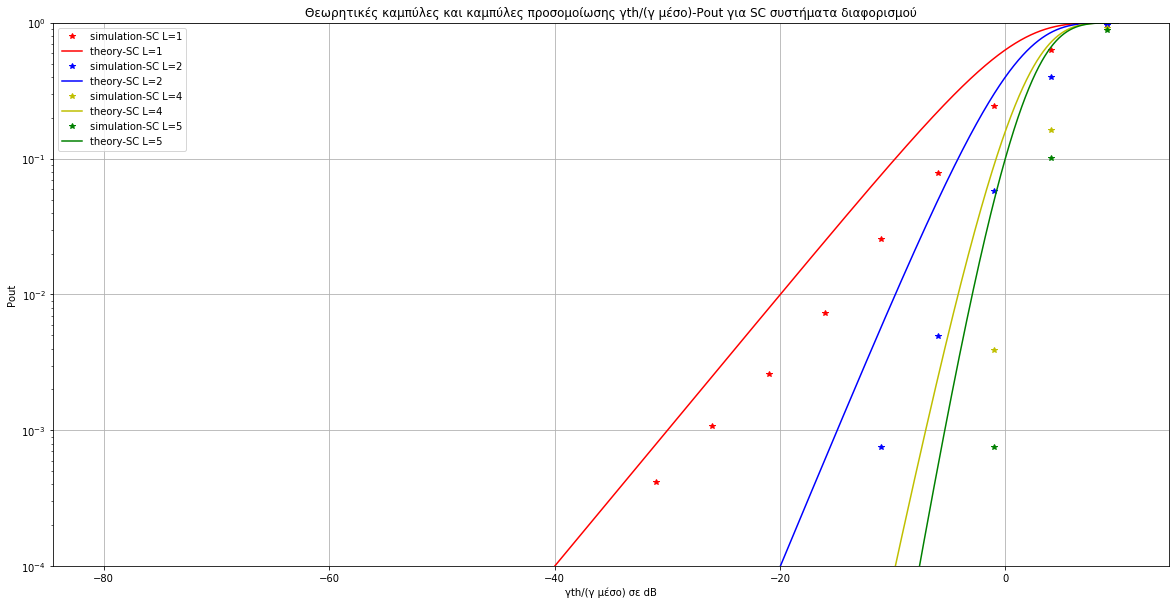

In [85]:
plt.figure(figsize=(20,10))
plt.semilogy(g2,Posim1,'*r',label="simulation-SC L=1")
plt.semilogy(g,Pout1,'r',label="theory-SC L=1")
plt.semilogy(g2,Posim2,'*b',label="simulation-SC L=2")
plt.semilogy(g,Pout2,'b',label="theory-SC L=2")
plt.semilogy(g2,Posim4,'*y',label="simulation-SC L=4")
plt.semilogy(g,Pout4,'y',label="theory-SC L=4")
plt.semilogy(g2,Posim5,'*g',label="simulation-SC L=5")
plt.semilogy(g,Pout5,'g',label="theory-SC L=5")
plt.ylim(10**-4,1) # Έως 10**-4 διότι αργεί πάρα πολύ στο "τρέξιμο" ο κώδικας για σωστά αποτελέσματα για πιο μικρή πιθανότητα
plt.title("Θεωρητικές καμπύλες και καμπύλες προσομοίωσης γth/(γ μέσο)-Pout για SC συστήματα διαφορισμού")
plt.ylabel("Pout")
plt.xlabel("γth/(γ μέσο) σε dB")
plt.legend(loc="upper left")
plt.grid()
plt.show()

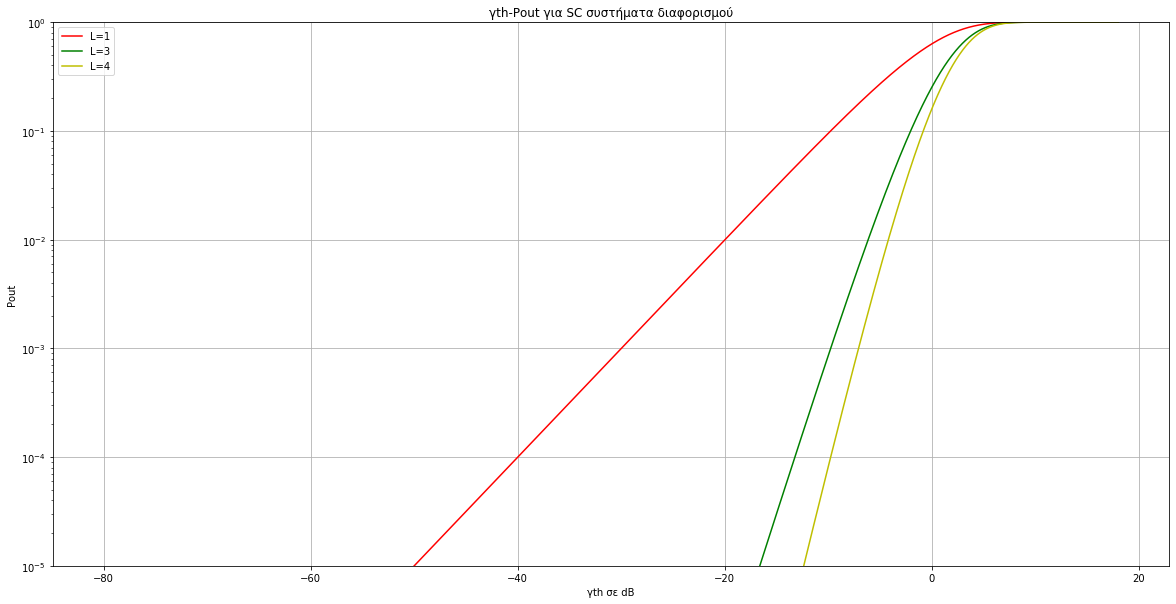

In [91]:
#β)
g=[]
Pout1=[]
Pout3=[]
Pout4=[]
for i in arange(-88,10,0.0005):
    g.append(i+8)   
for i in range(0,len(g)):
    Pout1.append(1-np.exp(-10**(g[i]/10)))
    Pout3.append((1-np.exp(-10**(g[i]/10)))**3)
    Pout4.append((1-np.exp(-10**(g[i]/10)))**4)
plt.figure(figsize=(20,10))
plt.semilogy(g,Pout1,'r',label='L=1')
plt.semilogy(g,Pout3,'g',label='L=3')
plt.semilogy(g,Pout4,'y',label='L=4')
plt.legend(loc="upper left")
plt.ylim(10**-5,1)
plt.title("γth-Pout για SC συστήματα διαφορισμού")
plt.ylabel("Pout")
plt.xlabel("γth σε dB")
plt.grid()
plt.show()   

In [92]:
#γ)
#SC
def Po2SC(L):
    N=11000
    Pout=[]
    for i in arange(1,9,0.5):
        count=0
        for j in range(0,N):
            if L==1:
                s = (-1+0j) + 2*np.random.randint(2,size=1)
                h  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r  = h* s + n 
                gsc = (abs(r))**2 #Η ισχύς του θορύβου -108dBm απλοποιείται κατά τη σύγκριση με το κατώφλι σε κάθε περίπτωση
                x = -7 + i
                if gsc<(10**x): 
                    count=count+1
            elif L==2:
                s1 = (-1+0j) + 2*np.random.randint(2,size=1)
                h1  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n1  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r1  = h1* s1 + n1
                g1 = (abs(r1))**2
                s2 = (-1+0j) + 2*np.random.randint(2,size=1)
                h2  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n2  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r2  = h2* s2 + n2
                g2 = (abs(r2))**2
                x = -7 + i
                gsc = max(g1,g2)
                if gsc<(10**x):
                    count=count+1
            elif L==3:
                s1 = (-1+0j) + 2*np.random.randint(2,size=1)
                h1  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n1  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r1  = h1* s1 + n1
                g1 = (abs(r1))**2
                s2 = (-1+0j) + 2*np.random.randint(2,size=1)
                h2  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n2  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r2  = h2* s2 + n2
                g2 = (abs(r2))**2
                s3 = (-1+0j) + 2*np.random.randint(2,size=1)
                h3  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n3  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r3  = h3* s3 + n3
                g3 = (abs(r3))**2
                x = -7 + i
                gsc = max(g1,g2,g3)
                if gsc<(10**x):
                    count=count+1
            elif L==4:
                s1 = (-1+0j) + 2*np.random.randint(2,size=1)
                h1  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n1  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r1  = h1* s1 + n1
                g1 = (abs(r1))**2
                s2 = (-1+0j) + 2*np.random.randint(2,size=1)
                h2  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n2  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r2  = h2* s2 + n2
                g2 = (abs(r2))**2
                s3 = (-1+0j) + 2*np.random.randint(2,size=1)
                h3  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n3  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r3  = h3* s3 + n3
                g3 = (abs(r3))**2
                s4 = (-1+0j) + 2*np.random.randint(2,size=1)
                h4  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n4  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r4  = h4* s4 + n4
                g4 = (abs(r4))**2
                x = -7 + i
                gsc = max(g1,g2,g3,g4)
                if gsc<(10**x):
                    count=count+1
            elif L==5:
                s1 = (-1+0j) + 2*np.random.randint(2,size=1)
                h1  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n1  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r1  = h1* s1 + n1
                g1 = (abs(r1))**2
                s2 = (-1+0j) + 2*np.random.randint(2,size=1)
                h2  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n2  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r2  = h2* s2 + n2
                g2 = (abs(r2))**2
                s3 = (-1+0j) + 2*np.random.randint(2,size=1)
                h3  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n3  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r3  = h3* s3 + n3
                g3 = (abs(r3))**2
                s4 = (-1+0j) + 2*np.random.randint(2,size=1)
                h4  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n4  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r4  = h4* s4 + n4
                g4 = (abs(r4))**2
                s5 = (-1+0j) + 2*np.random.randint(2,size=1)
                h5  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n5  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r5  = h5* s5 + n5
                g5 = (abs(r5))**2
                x = -7 + i
                gsc = max(g1,g2,g3,g4,g5)
                if gsc<(10**x):
                    count=count+1
            else:
                s1 = (-1+0j) + 2*np.random.randint(2,size=1)
                h1  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n1  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r1  = h1* s1 + n1
                g1 = (abs(r1))**2
                s2 = (-1+0j) + 2*np.random.randint(2,size=1)
                h2  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n2  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r2  = h2* s2 + n2
                g2 = (abs(r2))**2
                s3 = (-1+0j) + 2*np.random.randint(2,size=1)
                h3  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n3  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r3  = h3* s3 + n3
                g3 = (abs(r3))**2
                s4 = (-1+0j) + 2*np.random.randint(2,size=1)
                h4  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n4  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r4  = h4* s4 + n4
                g4 = (abs(r4))**2
                s5 = (-1+0j) + 2*np.random.randint(2,size=1)
                h5  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n5  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r5  = h5* s5 + n5
                g5 = (abs(r5))**2
                s6 = (-1+0j) + 2*np.random.randint(2,size=1)
                h6  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n6  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r6  = h6* s6 + n6
                g6 = (abs(r6))**2
                x = -7 + i
                gsc = max(g1,g2,g3,g4,g5,g6)
                if gsc<(10**x):
                    count=count+1
        Pout.append(count/N)
    return Pout


In [93]:
Pos1=Po2SC(1)

In [94]:
Pos2=Po2SC(2)

In [95]:
Pos4=Po2SC(4)

In [96]:
Pos6=Po2SC(6)

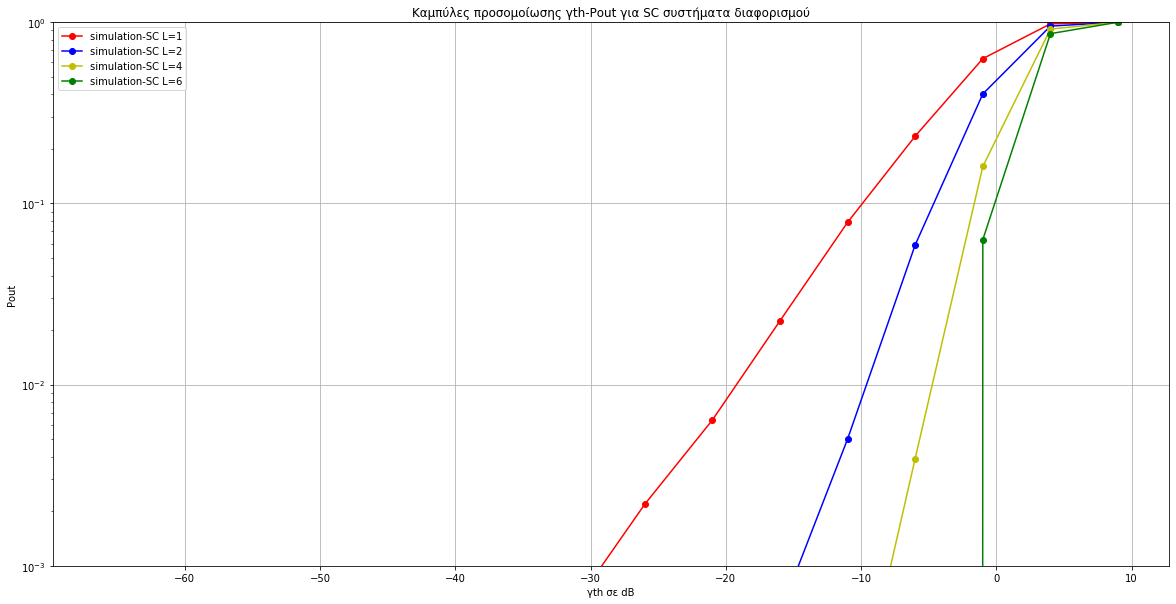

In [98]:
plt.figure(figsize=(20,10))
plt.semilogy(g2,Pos1,'or-',label="simulation-SC L=1")
plt.semilogy(g2,Pos2,'ob-',label="simulation-SC L=2")
plt.semilogy(g2,Pos4,'oy-',label="simulation-SC L=4")
plt.semilogy(g2,Pos6,'og-',label="simulation-SC L=6")
plt.ylim(10**-3,1) # Έως 10**-4 διότι αργεί πάρα πολύ στο "τρέξιμο" ο κώδικας για σωστά αποτελέσματα για πιο μικρή πιθανότητα
plt.title("Καμπύλες προσομοίωσης γth-Pout για SC συστήματα διαφορισμού")
plt.ylabel("Pout")
plt.xlabel("γth σε dB")
plt.legend(loc="upper left")
plt.grid()
plt.show()

In [99]:
#MRC
def PoMRC(L):
    N=11000
    Pout=[]
    for i in arange(1,9,0.5):
        count=0
        for j in range(0,N):
            if L==1:
                s = (-1+0j) + 2*np.random.randint(2,size=1)
                h  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r  = h* s + n 
                gsc = (abs(r))**2 #Η ισχύς του θορύβου -108dBm απλοποιείται κατά τη σύγκριση με το κατώφλι σε κάθε περίπτωση
                x = -7 + i
                if gsc<(10**x): 
                    count=count+1
            elif L==2:
                s1 = (-1+0j) + 2*np.random.randint(2,size=1)
                h1  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n1  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r1  = h1* s1 + n1
                g1 = (abs(r1))**2
                s2 = (-1+0j) + 2*np.random.randint(2,size=1)
                h2  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n2  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r2  = h2* s2 + n2
                g2 = (abs(r2))**2
                x = -7 + i
                gsc = g1+g2
                if gsc<(10**x):
                    count=count+1
            elif L==3:
                s1 = (-1+0j) + 2*np.random.randint(2,size=1)
                h1  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n1  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r1  = h1* s1 + n1
                g1 = (abs(r1))**2
                s2 = (-1+0j) + 2*np.random.randint(2,size=1)
                h2  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n2  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r2  = h2* s2 + n2
                g2 = (abs(r2))**2
                s3 = (-1+0j) + 2*np.random.randint(2,size=1)
                h3  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n3  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r3  = h3* s3 + n3
                g3 = (abs(r3))**2
                x = -7 + i
                gsc = g1+g2+g3
                if gsc<(10**x):
                    count=count+1
            elif L==4:
                s1 = (-1+0j) + 2*np.random.randint(2,size=1)
                h1  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n1  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r1  = h1* s1 + n1
                g1 = (abs(r1))**2
                s2 = (-1+0j) + 2*np.random.randint(2,size=1)
                h2  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n2  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r2  = h2* s2 + n2
                g2 = (abs(r2))**2
                s3 = (-1+0j) + 2*np.random.randint(2,size=1)
                h3  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n3  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r3  = h3* s3 + n3
                g3 = (abs(r3))**2
                s4 = (-1+0j) + 2*np.random.randint(2,size=1)
                h4  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n4  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r4  = h4* s4 + n4
                g4 = (abs(r4))**2
                x = -7 + i
                gsc = g1+g2+g3+g4
                if gsc<(10**x):
                    count=count+1
            elif L==5:
                s1 = (-1+0j) + 2*np.random.randint(2,size=1)
                h1  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n1  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r1  = h1* s1 + n1
                g1 = (abs(r1))**2
                s2 = (-1+0j) + 2*np.random.randint(2,size=1)
                h2  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n2  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r2  = h2* s2 + n2
                g2 = (abs(r2))**2
                s3 = (-1+0j) + 2*np.random.randint(2,size=1)
                h3  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n3  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r3  = h3* s3 + n3
                g3 = (abs(r3))**2
                s4 = (-1+0j) + 2*np.random.randint(2,size=1)
                h4  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n4  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r4  = h4* s4 + n4
                g4 = (abs(r4))**2
                s5 = (-1+0j) + 2*np.random.randint(2,size=1)
                h5  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n5  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r5  = h5* s5 + n5
                g5 = (abs(r5))**2
                x = -7 + i
                gsc = g1+g2+g3+g4+g5
                if gsc<(10**x):
                    count=count+1
            else:
                s1 = (-1+0j) + 2*np.random.randint(2,size=1)
                h1  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n1  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r1  = h1* s1 + n1
                g1 = (abs(r1))**2
                s2 = (-1+0j) + 2*np.random.randint(2,size=1)
                h2  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n2  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r2  = h2* s2 + n2
                g2 = (abs(r2))**2
                s3 = (-1+0j) + 2*np.random.randint(2,size=1)
                h3  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n3  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r3  = h3* s3 + n3
                g3 = (abs(r3))**2
                s4 = (-1+0j) + 2*np.random.randint(2,size=1)
                h4  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n4  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r4  = h4* s4 + n4
                g4 = (abs(r4))**2
                s5 = (-1+0j) + 2*np.random.randint(2,size=1)
                h5  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n5  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r5  = h5* s5 + n5
                g5 = (abs(r5))**2
                s6 = (-1+0j) + 2*np.random.randint(2,size=1)
                h6  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n6  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r6  = h6* s6 + n6
                g6 = (abs(r6))**2
                x = -7 + i
                gsc = g1+g2+g3+g4+g5+g6
                if gsc<(10**x):
                    count=count+1
        Pout.append(count/N)
    return Pout

In [100]:
Pom1=PoMRC(1)

In [101]:
Pom2=PoMRC(2)

In [103]:
Pom4=PoMRC(4)

In [104]:
Pom6=PoMRC(6)

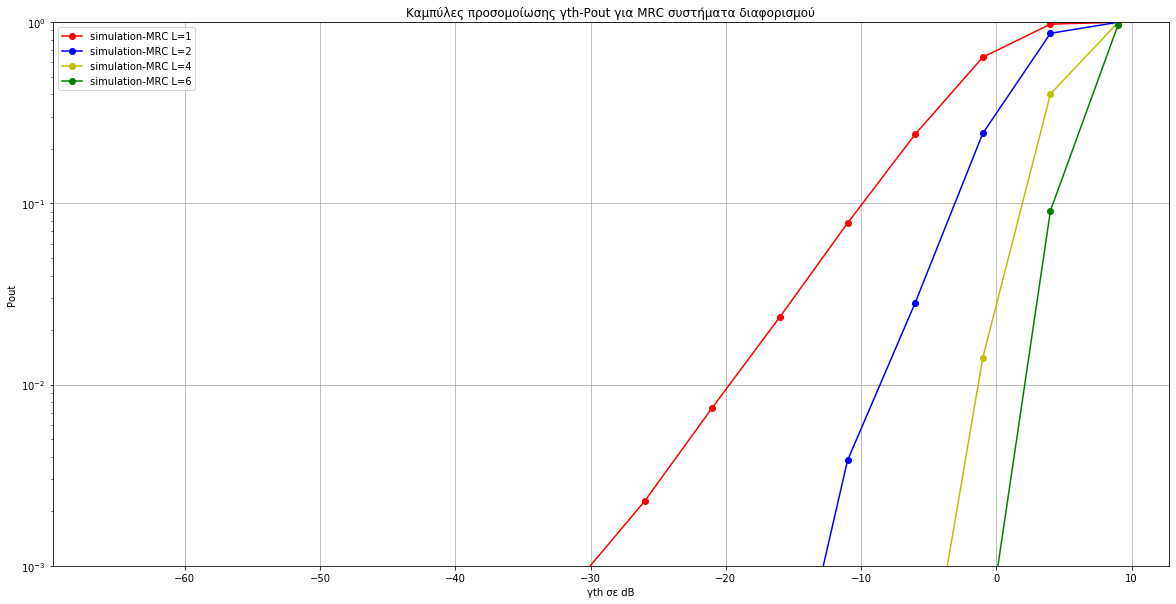

In [106]:
plt.figure(figsize=(20,10))
plt.semilogy(g2,Pom1,'or-',label="simulation-MRC L=1")
plt.semilogy(g2,Pom2,'ob-',label="simulation-MRC L=2")
plt.semilogy(g2,Pom4,'oy-',label="simulation-MRC L=4")
plt.semilogy(g2,Pom6,'og-',label="simulation-MRC L=6")
plt.ylim(10**-3,1) # Έως 10**-4 διότι αργεί πάρα πολύ στο "τρέξιμο" ο κώδικας για σωστά αποτελέσματα για πιο μικρή πιθανότητα
plt.title("Καμπύλες προσομοίωσης γth-Pout για MRC συστήματα διαφορισμού")
plt.ylabel("Pout")
plt.xlabel("γth σε dB")
plt.legend(loc="upper left")
plt.grid()
plt.show()

In [107]:
#EGC
def EGC(L):
    N=11000
    Pout=[]
    for i in arange(1,9,0.5):
        count=0
        for j in range(0,N):
            if L==1:
                s = (-1+0j) + 2*np.random.randint(2,size=1)
                h  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r  = h* s + n 
                gsc = (abs(r))**2 #Η ισχύς του θορύβου -108dBm απλοποιείται κατά τη σύγκριση με το κατώφλι σε κάθε περίπτωση
                x = -7 + i
                if gsc<(10**x): 
                    count=count+1
            elif L==2:
                s1 = (-1+0j) + 2*np.random.randint(2,size=1)
                h1  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n1  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r1  = h1* s1 + n1
                g1 = (abs(r1))**2
                s2 = (-1+0j) + 2*np.random.randint(2,size=1)
                h2  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n2  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r2  = h2* s2 + n2
                g2 = (abs(r2))**2
                x = -7 + i
                gsc = (g1+g2)/2
                if gsc<(10**x):
                    count=count+1
            elif L==3:
                s1 = (-1+0j) + 2*np.random.randint(2,size=1)
                h1  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n1  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r1  = h1* s1 + n1
                g1 = (abs(r1))**2
                s2 = (-1+0j) + 2*np.random.randint(2,size=1)
                h2  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n2  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r2  = h2* s2 + n2
                g2 = (abs(r2))**2
                s3 = (-1+0j) + 2*np.random.randint(2,size=1)
                h3  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n3  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r3  = h3* s3 + n3
                g3 = (abs(r3))**2
                x = -7 + i
                gsc = (g1+g2+g3)/3
                if gsc<(10**x):
                    count=count+1
            elif L==4:
                s1 = (-1+0j) + 2*np.random.randint(2,size=1)
                h1  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n1  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r1  = h1* s1 + n1
                g1 = (abs(r1))**2
                s2 = (-1+0j) + 2*np.random.randint(2,size=1)
                h2  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n2  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r2  = h2* s2 + n2
                g2 = (abs(r2))**2
                s3 = (-1+0j) + 2*np.random.randint(2,size=1)
                h3  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n3  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r3  = h3* s3 + n3
                g3 = (abs(r3))**2
                s4 = (-1+0j) + 2*np.random.randint(2,size=1)
                h4  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n4  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r4  = h4* s4 + n4
                g4 = (abs(r4))**2
                x = -7 + i
                gsc = (g1+g2+g3+g4)/4
                if gsc<(10**x):
                    count=count+1
            elif L==5:
                s1 = (-1+0j) + 2*np.random.randint(2,size=1)
                h1  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n1  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r1  = h1* s1 + n1
                g1 = (abs(r1))**2
                s2 = (-1+0j) + 2*np.random.randint(2,size=1)
                h2  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n2  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r2  = h2* s2 + n2
                g2 = (abs(r2))**2
                s3 = (-1+0j) + 2*np.random.randint(2,size=1)
                h3  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n3  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r3  = h3* s3 + n3
                g3 = (abs(r3))**2
                s4 = (-1+0j) + 2*np.random.randint(2,size=1)
                h4  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n4  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r4  = h4* s4 + n4
                g4 = (abs(r4))**2
                s5 = (-1+0j) + 2*np.random.randint(2,size=1)
                h5  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n5  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r5  = h5* s5 + n5
                g5 = (abs(r5))**2
                x = -7 + i
                gsc = (g1+g2+g3+g4+g5)/5
                if gsc<(10**x):
                    count=count+1
            else:
                s1 = (-1+0j) + 2*np.random.randint(2,size=1)
                h1  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n1  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r1  = h1* s1 + n1
                g1 = (abs(r1))**2
                s2 = (-1+0j) + 2*np.random.randint(2,size=1)
                h2  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n2  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r2  = h2* s2 + n2
                g2 = (abs(r2))**2
                s3 = (-1+0j) + 2*np.random.randint(2,size=1)
                h3  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n3  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r3  = h3* s3 + n3
                g3 = (abs(r3))**2
                s4 = (-1+0j) + 2*np.random.randint(2,size=1)
                h4  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n4  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r4  = h4* s4 + n4
                g4 = (abs(r4))**2
                s5 = (-1+0j) + 2*np.random.randint(2,size=1)
                h5  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n5  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r5  = h5* s5 + n5
                g5 = (abs(r5))**2
                s6 = (-1+0j) + 2*np.random.randint(2,size=1)
                h6  = 1/np.sqrt(2)*(rayleigh.rvs(size=1) + 1j*rayleigh.rvs(size=1))
                n6  = 1/np.sqrt(2)*(np.random.randn(1) + 1j*np.random.randn(1))
                r6  = h6* s6 + n6
                g6 = (abs(r6))**2
                x = -7 + i
                gsc = (g1+g2+g3+g4+g5+g6)/6
                if gsc<(10**x):
                    count=count+1
        Pout.append(count/N)
    return Pout

In [108]:
Po1 = EGC(1)

In [109]:
Po2 = EGC(2)

In [110]:
Po4 = EGC(4)

In [112]:
Po6 = EGC(6)

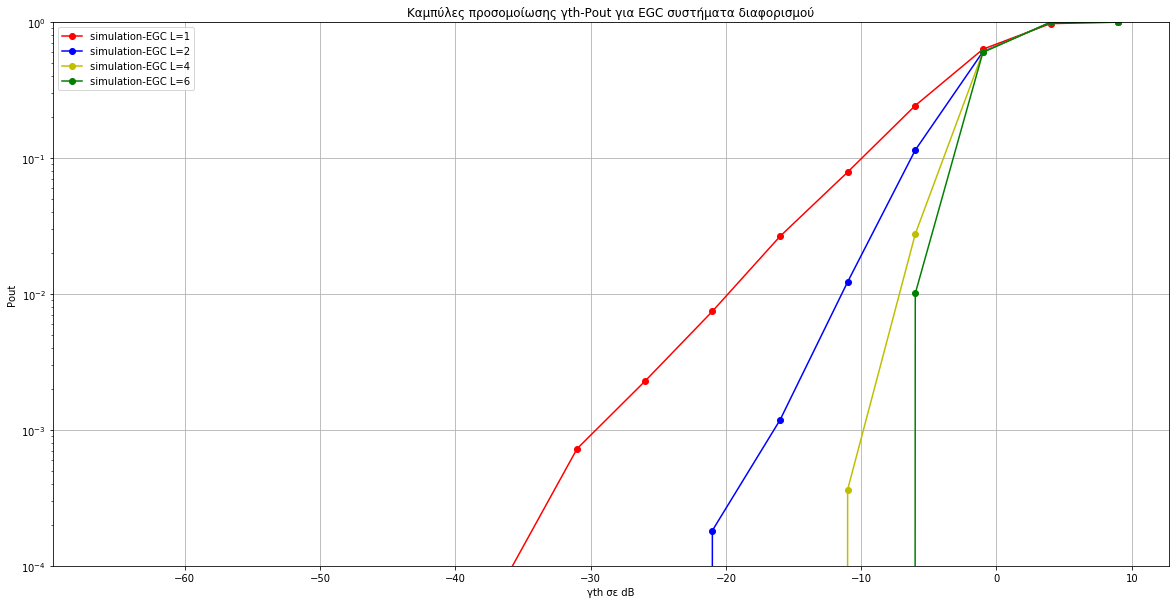

In [113]:
plt.figure(figsize=(20,10))
plt.semilogy(g2,Po1,'or-',label="simulation-EGC L=1")
plt.semilogy(g2,Po2,'ob-',label="simulation-EGC L=2")
plt.semilogy(g2,Po4,'oy-',label="simulation-EGC L=4")
plt.semilogy(g2,Po6,'og-',label="simulation-EGC L=6")
plt.ylim(10**-4,1) # Έως 10**-4 διότι αργεί πάρα πολύ στο "τρέξιμο" ο κώδικας για σωστά αποτελέσματα για πιο μικρή πιθανότητα
plt.title("Καμπύλες προσομοίωσης γth-Pout για EGC συστήματα διαφορισμού")
plt.ylabel("Pout")
plt.xlabel("γth σε dB")
plt.legend(loc="upper left")
plt.grid()
plt.show()

In [114]:
Pom3=PoMRC(3)

In [115]:
Po3 = EGC(3)

In [116]:
Pos3=Po2SC(3)

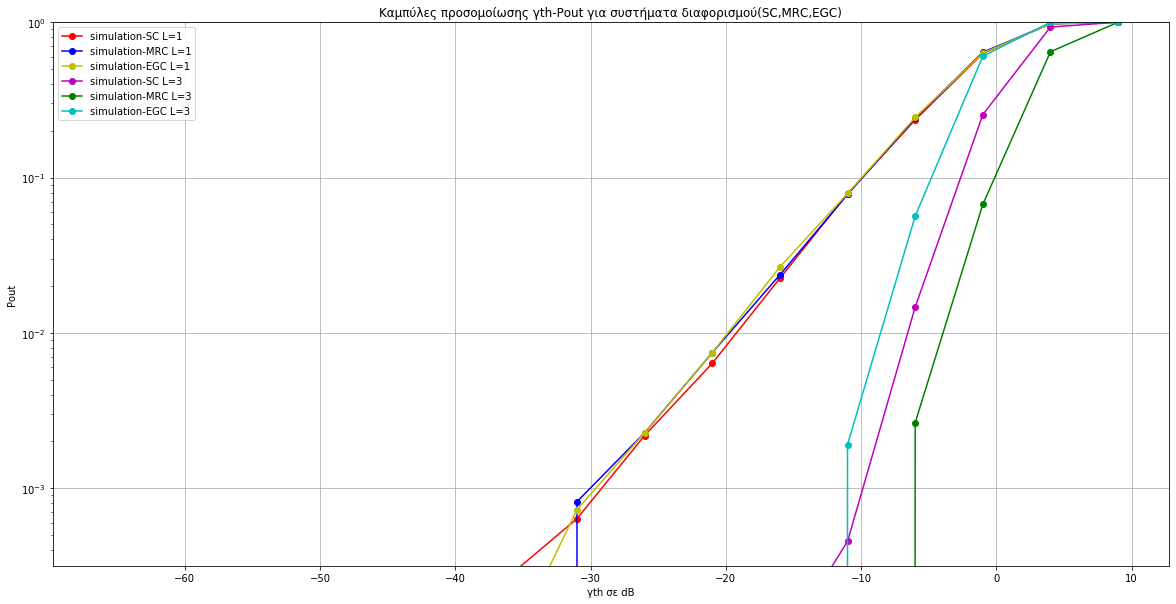

In [123]:
plt.figure(figsize=(20,10))
plt.semilogy(g2,Pos1,'or-',label="simulation-SC L=1")
plt.semilogy(g2,Pom1,'ob-',label="simulation-MRC L=1")
plt.semilogy(g2,Po1,'oy-',label="simulation-EGC L=1")
plt.semilogy(g2,Pos3,'om-',label="simulation-SC L=3")
plt.semilogy(g2,Pom3,'og-',label="simulation-MRC L=3")
plt.semilogy(g2,Po3,'oc-',label="simulation-EGC L=3")
plt.ylim(10**-3.5,1) # Έως 10**-3 διότι αργεί πάρα πολύ στο "τρέξιμο" ο κώδικας για σωστά αποτελέσματα για πιο μικρή πιθανότητα
plt.title("Καμπύλες προσομοίωσης γth-Pout για συστήματα διαφορισμού(SC,MRC,EGC)")
plt.ylabel("Pout")
plt.xlabel("γth σε dB")
plt.legend(loc="upper left")
plt.grid()
plt.show()

In [25]:
#δ)


In [124]:
#Με βάση την προεργασία μου,θα υπολογίσω το αντίστοιχο SNR για τις πιθανότητες της εκφώνησης για κάθε περίπτωση.Θα μπορούσα να
#χρησιμοποιήσω το θεωρητικά μοντέλα αλλά θα βγάλω ένα προσεγγιστικό αποτέλεσμα.Επίσης θα το κάνω για πιθανότητες 10**-3 και για
#10**-2 (γιατί για σωστό αποτέλεσμα για 10**-5 αργεί πολύ το πρόγραμμα).Πρώτα για την SC βρίσκω το Pout σε σχέση με το γth για 
#L=5 που δεν έχω υπολογίσει πιο πριν.
#SC
Pos5=Po2SC(5)

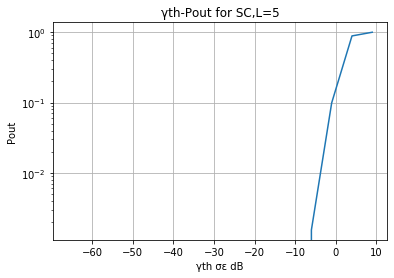

In [130]:
#βλέπω που αντιστοιχεί το (περίπου 10**-3 και που το περίπου 10**-4)
plt.semilogy(g2,Pos5)
plt.title("γth-Pout for SC,L=5")
plt.xlabel("γth σε dB")
plt.ylabel("Pout")
plt.grid()
plt.show()

In [ ]:
#Στη συνέχεια από τα έτοιμα γραφήματα παίρνω τις τιμές που πρέπει και φτιάχνω τις παρακάτω λίστες για το αποτέλεσμα.Το κέρδος
#διαφορισμόυ G(Pout)=γth_div(Pout)-γth_simple(Pout) σε dB.Οπ΄ότε από τα γραφήματα έχω:α)Για πιθανότητα 10**-3:
#i)Gsc_(L=2,10**-3)=-15dB-(-44dB)=29dB
#ii)Gsc_(L=3,10**-3)=-12dB-(-44dB)=32dB
#iii)Gsc_(L=4,10**-3)=-8dB-(-44dB)=36dB
#iv)Gsc_(L=5,10**-3)=-6dB-(-44dB)=38B
#β)α)Για πιθανότητα 10**-2:
#i)Gsc_(L=2,10**-2)=-10dB-(-36dB)=26dB
#ii)Gsc_(L=3,10**-2)=-7dB-(-36dB)=29dB
#iii)Gsc_(L=4,10**-2)=-4dB-(-36dB)=32dB
#iv)Gsc_(L=5,10**-2)=-5dB-(-36dB)=31dB

In [136]:
L=[2,3,4,5]
Gsc1=[29,32,36,38]
Gsc2=[26,29,32,31]


In [137]:
#Ακολουθώ τα ίδια ακριβώς βήματα για τις άλλες τεχνικές diversity combining
Pom5=PoMRC(5)

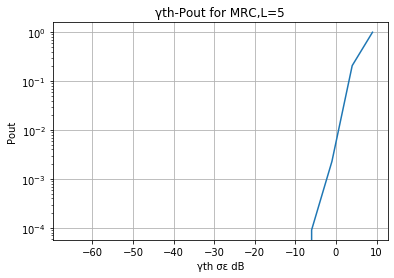

In [139]:
#MRC
#βλέπω που αντιστοιχεί το (περίπου 10**-3 και που το περίπου 10**-4)
plt.semilogy(g2,Pom5)
plt.title("γth-Pout for MRC,L=5")
plt.xlabel("γth σε dB")
plt.ylabel("Pout")
plt.grid()
plt.show()

In [ ]:
#Οπ΄ότε από τα γραφήματα έχω:α)Για πιθανότητα 10**-3:
#i)Gmrc_(L=2,10**-3)=-13dB-(-46dB)=33dB
#ii)Gmrc_(L=3,10**-3)=-7dB-(-46dB)=39dB
#iii)Gmrc_(L=4,10**-3)=-5dB-(-46dB)=41dB
#iv)Gmrc_(L=5,10**-3)=-4dB-(-46dB)=42dB
#β)α)Για πιθανότητα 10**-2:
#i)Gmrc_(L=2,10**-2)=-8dB-(-39dB)=31dB
#ii)Gmrc_(L=3,10**-2)=-6B-(-39dB)=33dB
#iii)Gmrc_(L=4,10**-2)=-4dB-(-39dB)=35dB
#iv)Gmrc_(L=5,10**-2)=-3dB-(-39dB)=36dB

In [141]:
Gmrc1=[33,39,41,42]
Gmrc2=[31,33,35,36]


In [140]:
#EGC
Po5=EGC(5)


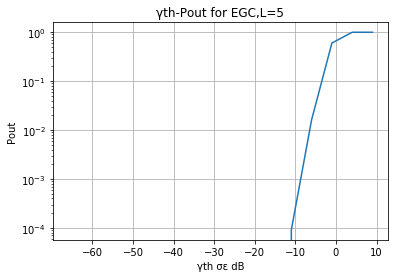

In [142]:
plt.semilogy(g2,Po5)
plt.title("γth-Pout for EGC,L=5")
plt.xlabel("γth σε dB")
plt.ylabel("Pout")
plt.grid()
plt.show()

In [77]:
#Οπ΄ότε από τα γραφήματα έχω:α)Για πιθανότητα 10**-3:
#i)Gegc_(L=2,10**-3)=-15dB-(-48dB)=33dB
#ii)Gegc_(L=3,10**-3)=-11dB-(-48dB)=37dB
#iii)Gegc_(L=4,10**-3)=-10dB-(-48dB)=38dB
#iv)Gegc_(L=5,10**-3)=-9dB-(-48dB)=39dB
#β)α)Για πιθανότητα 10**-2:
#i)Gegc_(L=2,10**-2)=-12dB-(-40dB)=28dB
#ii)Gegc_(L=3,10**-2)=-8dB-(-40dB)=32dB
#iii)Gegc_(L=4,10**-2)=-6dB-(-40dB)=34dB
#iv)Gegc_(L=5,10**-2)=-5dB-(-40dB)=35dB

In [143]:
Gegc1=[33,37,38,39]
Gegc2=[28,32,34,35]

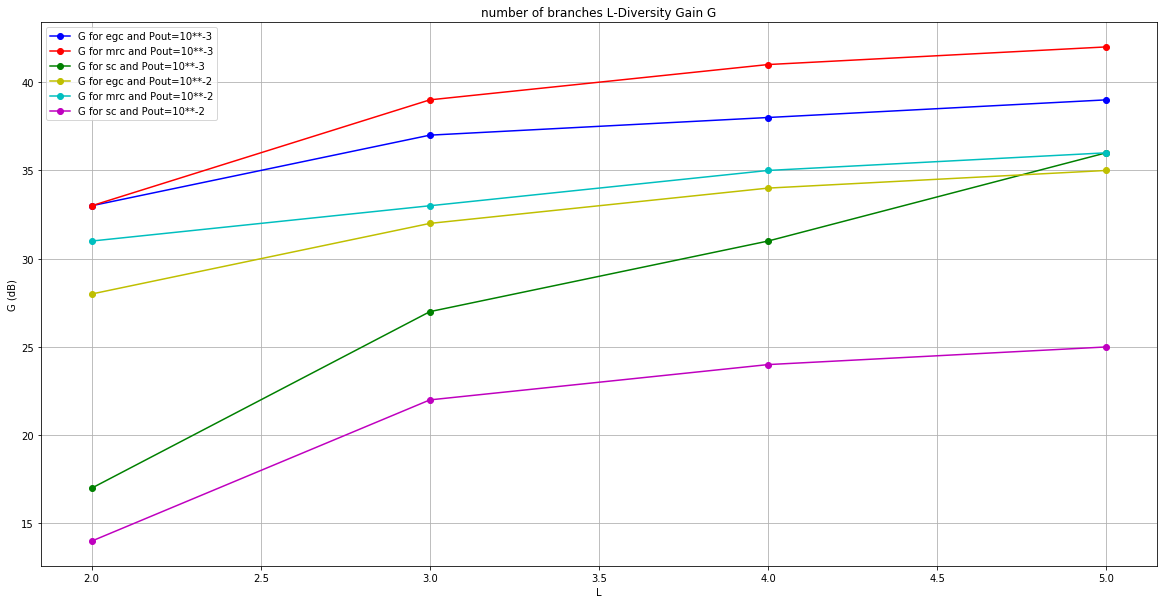

In [145]:
plt.figure(figsize=(20,10))
plt.plot(L,Gegc1,'ob-',label="G for egc and Pout=10**-3")
plt.plot(L,Gmrc1,'or-',label="G for mrc and Pout=10**-3")
plt.plot(L,Gsc1,'og-',label="G for sc and Pout=10**-3")
plt.title("number of branches L-Diversity Gain G")
plt.plot(L,Gegc2,'oy-',label="G for egc and Pout=10**-2")
plt.plot(L,Gmrc2,'oc-',label="G for mrc and Pout=10**-2")
plt.plot(L,Gsc2,'om-',label="G for sc and Pout=10**-2")
plt.xlabel("L")
plt.ylabel("G (dB)")
plt.legend(loc="upper left")
plt.grid()
plt.show()

In [85]:
#Αυτό που παρατηρούμε είναι ότι σε γενικές γραμμές την καλύτερη επίδοση την έχει το MRC, ενώ το egc μπορεί να θεωρηθεί καλύτερο
#από το sc χωρίς μεγάλη διαφορά. Επίσης τα συστήματα παρουσιάζουν μεγαλύτερο κέρδος διαφορισμού για μικρότερες πιθανότητες
#αποκοπής. Όσο το Pout είναι πιο κοντά στο 1, τόσο μειώνεται το κέρδος αυτό.